In [ ]:
! pip install --upgrade category_encoders

/tmp/ipykernel_7060/4113979149.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(data, header=None, sep=',\s')
/home/codespace/.python/current/lib/python3.10/site-packages/category_encoders/utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
/home/codespace/.python/current/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/home/codespace/.python/current/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_cate

Model accuracy score: 0.8083
Training set accuracy score: 0.8067
Test set accuracy score: 0.8083
These two values are quite comparable. So, there is no sign of overfitting.
Null accuracy score: 0.7582
Confusion matrix

 [[5999 1408]
 [ 465 1897]]

True Positives(TP) =  5999

True Negatives(TN) =  1897

False Positives(FP) =  1408

False Negatives(FN) =  465
              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.84      0.81      0.82      9769

Classification accuracy : 0.8083
Classification error : 0.1917
Precision : 0.8099
Recall or Sensitivity : 0.9281
True Positive Rate : 0.9281
False Positive Rate : 0.4260
Specificity : 0.5740


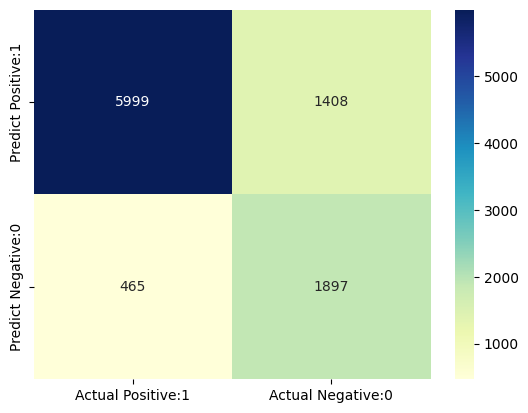

In [5]:
##################
# Import Libraries
##################
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

################
# Import Dataset
################
data = '/workspaces/naive-bayes-classifier/data/adult.csv'
df = pd.read_csv(data, header=None, sep=',\s')


###########################
# Exploratory data analysis
###########################
# Rename column names
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']

# replace '?' values in workclass variable with `NaN`
df['workclass'].replace('?', np.NaN, inplace=True)

# replace '?' values in occupation variable with `NaN`
df['occupation'].replace('?', np.NaN, inplace=True)

# replace '?' values in native_country variable with `NaN`
df['native_country'].replace('?', np.NaN, inplace=True)

# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']


############################################
# Declare feature vector and target variable 
############################################
X = df.drop(['income'], axis=1)
y = df['income']


################################################
# Split data into separate training and test set
################################################

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


#####################
# Feature Engineering
#####################
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

# impute missing categorical variables with most frequent value
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)


# import category encoders
import category_encoders as ce

# encode remaining variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

#################
# Feature Scaling
#################
cols = X_train.columns

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])


#################
# Model Training
#################
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)


#####################
# Predict the results
#####################
y_pred = gnb.predict(X_test)


################
# Accuracy Score
################
from sklearn.metrics import accuracy_score
y_pred_train = gnb.predict(X_train)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

################
# Accuracy Score
################
print('Training set accuracy score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set accuracy score: {:.4f}'.format(gnb.score(X_test, y_test)))
print('These two values are quite comparable. So, there is no sign of overfitting.')


#####################
# Null Accuracy Score
#####################

# check class distribution in test set
y_test.value_counts()

# check null accuracy score
null_accuracy = (7407/(7407+2362))
# We can see that the occurences of most frequent class is 7407. So, we can calculate null accuracy by dividing 7407 by total number of occurences.
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

##################
# Confusion Matrix
##################

# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#########################
# Classification metrices
#########################
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

# recall score
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

# True positive rate
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

# False negative rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

# specificity score
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))
